# Import libraries, and load MealAnalysis2017 file

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Change directory here**

In [79]:
ma2017_raw = pd.read_csv("C:/Users/kohwy/Desktop/MealAnalysis2017.csv")
ma2017_raw.head()

,Unnamed: 0,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,1.0,breakfast,female,32.0,157.0,48.0,1655.0,62.0,46.0,248.0,2.0,334.0,5.9,0.8,75.7,0.2,29.0,2.0
1,2.0,breakfast,female,35.0,161.0,55.0,2073.0,78.0,58.0,311.0,2.0,214.0,4.6,4.5,41.3,0.1,0.0,1.0
2,3.0,breakfast,female,26.0,159.0,51.0,2042.0,77.0,57.0,306.0,4.0,352.0,27.3,18.9,18.1,2.8,116.0,2.0
3,4.0,breakfast,female,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,2.0,295.0,5.6,0.9,65.1,0.7,189.0,2.0
4,5.0,dinner,female,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,5.0,876.0,41.5,34.2,96.3,6.4,54.0,2.0


In [80]:
ma2017 = ma2017_raw.dropna()
ma2017.head()

,Unnamed: 0,Type,gender,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],P[g],F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best)
0,1.0,breakfast,female,32.0,157.0,48.0,1655.0,62.0,46.0,248.0,2.0,334.0,5.9,0.8,75.7,0.2,29.0,2.0
1,2.0,breakfast,female,35.0,161.0,55.0,2073.0,78.0,58.0,311.0,2.0,214.0,4.6,4.5,41.3,0.1,0.0,1.0
2,3.0,breakfast,female,26.0,159.0,51.0,2042.0,77.0,57.0,306.0,4.0,352.0,27.3,18.9,18.1,2.8,116.0,2.0
3,4.0,breakfast,female,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,2.0,295.0,5.6,0.9,65.1,0.7,189.0,2.0
4,5.0,dinner,female,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,5.0,876.0,41.5,34.2,96.3,6.4,54.0,2.0


In [81]:
ma2017.isnull().any()

Unnamed: 0                            False
Type                                  False
gender                                False
age                                   False
height                                False
weight                                False
EER[kcal]                             False
P target(15%)[g]                      False
F target(25%)[g]                      False
C target(60%)[g]                      False
number of dishes                      False
E[kcal]                               False
P[g]                                  False
F[g]                                  False
C[g]                                  False
Salt[g]                               False
Vegetables[g]                         False
Score(1:worst 2:bad 3:good 4:best)    False
dtype: bool

# Visualize data

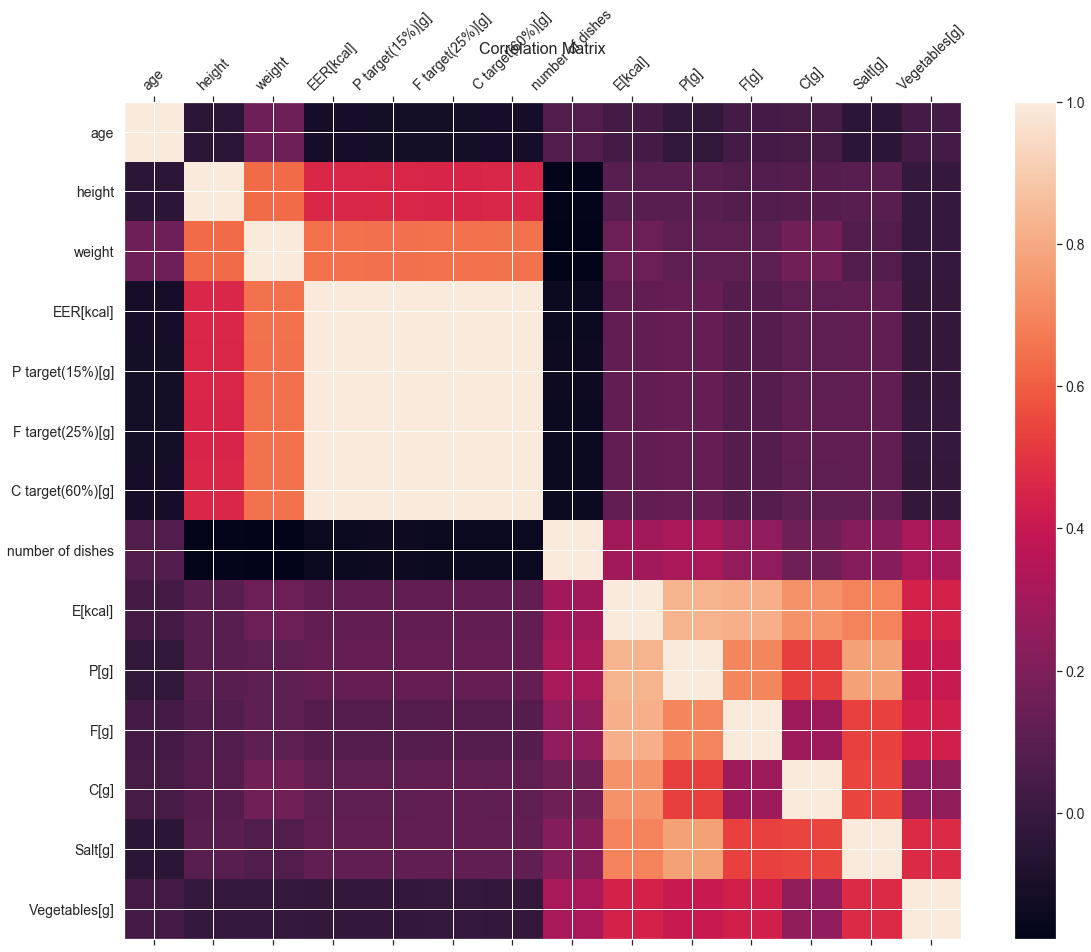

In [82]:
df = ma2017.iloc[:, 3:17]

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Encode meal type and gender

In [100]:
ma2017_2 = pd.get_dummies(ma2017, columns =['Type', 'gender'])
ma2017_2.head()

,Unnamed: 0,age,height,weight,EER[kcal],P target(15%)[g],F target(25%)[g],C target(60%)[g],number of dishes,E[kcal],...,F[g],C[g],Salt[g],Vegetables[g],Score(1:worst 2:bad 3:good 4:best),Type_breakfast,Type_dinner,Type_lunch,gender_female,gender_male
0,1.0,32.0,157.0,48.0,1655.0,62.0,46.0,248.0,2.0,334.0,...,0.8,75.7,0.2,29.0,2.0,1,0,0,1,0
1,2.0,35.0,161.0,55.0,2073.0,78.0,58.0,311.0,2.0,214.0,...,4.5,41.3,0.1,0.0,1.0,1,0,0,1,0
2,3.0,26.0,159.0,51.0,2042.0,77.0,57.0,306.0,4.0,352.0,...,18.9,18.1,2.8,116.0,2.0,1,0,0,1,0
3,4.0,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,2.0,295.0,...,0.9,65.1,0.7,189.0,2.0,1,0,0,1,0
4,5.0,48.0,164.0,57.0,1772.0,66.0,49.0,266.0,5.0,876.0,...,34.2,96.3,6.4,54.0,2.0,0,1,0,1,0


# Try out Logistic Regression

In [102]:
ma2017data = ma2017_2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]]
ma2017score = ma2017_2.iloc[:, 15]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(ma2017data, ma2017score, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression(solver='liblinear', multi_class='auto')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.729483282674772


In [116]:
y_pred = logisticRegr.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 66  28   1   0]
 [ 10 164   5   0]
 [  1  40  10   0]
 [  0   3   1   0]]


# Try out Random Forest